In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import spacy
nlp=spacy.load('en_core_web_sm')

In [2]:
spacy.__version__

'3.5.3'

In [3]:
user_persona = pd.read_json("../data/tech_career_track.json")
user_persona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   career track    6 non-null      object
 1   attribute 1     6 non-null      object
 2   attribute 2     6 non-null      object
 3   attribute 3     6 non-null      object
 4   special traits  6 non-null      object
 5   tech or stack   6 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [4]:
user_persona = user_persona.replace({
    "":np.nan,
})

In [5]:
user_persona

,career track,attribute 1,attribute 2,attribute 3,special traits,tech or stack
0,front-end developer,creative,NaN,logical thinker,NaN,"[frontend, html, css, javascript]"
1,back-end developer,logical thinker,NaN,analytical,NaN,"[backend, database, python, nodejs]"
2,machine learning / data scientist,analytical,NaN,data-driven,mathematical inclined,"[data, data-science, machine-learning, python]"
3,cloud developer,NaN,logical thinker,analytical,infrastructure,"[cloud, devops, microservice, architecture]"
4,mobile developer,creative,NaN,user-focused,tech-savvy,"[mobile, multiplatform, android, ios]"
5,ui/ux designer,creative,user-focused,NaN,empathetic,"[figma, research, mockup, wireframe]"


user persona

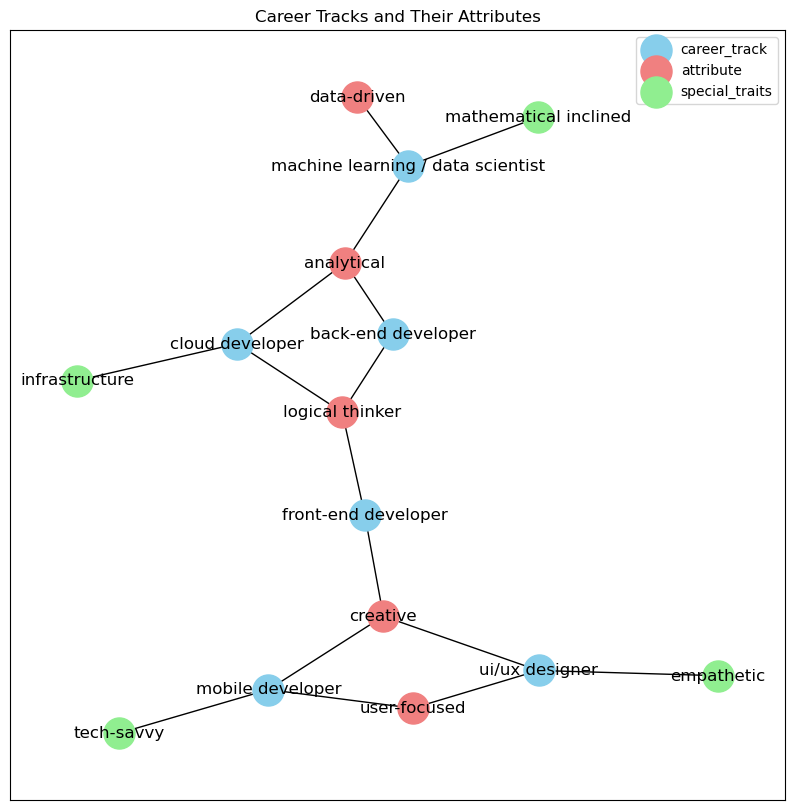

In [10]:

# Create a Pandas DataFrame from the JSON data
df = pd.DataFrame(user_persona.copy())

# Create a graph
G = nx.Graph()

# Add nodes (career tracks) to the graph
for career_track in df["career track"]:
    G.add_node(career_track, type="career_track")

# Add nodes (attributes) to the graph and connect them to career tracks
for index, row in df.iterrows():
    career_track = row["career track"]
    attributes = row[["attribute 1", "attribute 2", "attribute 3"]]
    special_traits = row["special traits"]
    
    # Use numpy to check for NaN values in attributes and special_traits
    attributes = [attr for attr in attributes if not pd.isna(attr)]
    
    for attribute in attributes:
        G.add_node(attribute, type="attribute")
        G.add_edge(career_track, attribute)
    
    if not pd.isna(special_traits):  # Check if special_traits is not NaN
        G.add_node(special_traits, type="special_traits")
        G.add_edge(career_track, special_traits)

# Remove the "special_traits" node if it's NaN
if pd.isna(row["special traits"]):
    G.remove_node(row["special traits"])

# Define node colors based on node types
node_colors = {
    "career_track": "skyblue",
    "attribute": "lightcoral",
    "special_traits": "lightgreen",
}

# Draw the graph with specified node colors
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))

for node_type, color in node_colors.items():
    nodes = [node for node, data in G.nodes(data=True) if data["type"] == node_type]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=500, node_color=color, label=node_type)

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plt.title("Career Tracks and Their Attributes", fontsize=12)
plt.legend(loc="upper right")
plt.show()
